# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [8]:
# Dependencies and Setup
import matplotlib.pyplot as plt
from pprint import pprint
import pandas as pd
import numpy as np
import requests
import time
import datetime

# Import API key
import api_keys

# Incorporated citypy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities and city_name
lat_lngs = []
cities = []
city_name=[]

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1])
    
#If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print (len(cities))

608


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
api_key = "71b4ddb313fad6dac4b0891305019b80"
url = "http://api.openweathermap.org/data/2.5/weather?"
temps = []
humid = []
clouds = []
winds = []
lats = []
lons = []
cityname = []
date = []

x = 1

# Build query URL
for city in cities:
    name = city.city_name
    
    print("Retreiving data for City #"+ str(x) + " of " + str((len(cities))) + " ... "  + name )
    query_url = url + "appid=" + api_key + "&q=" + name + "&units=imperial"
    print(query_url)
    print(50 * "-")
    
    weather_response = requests.get(query_url)
    response = weather_response.json()
   
    
    try:
        
        temps.append(response["main"]["temp"])
        humid.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        winds.append(response["wind"]["speed"])
        lats.append(response["coord"]["lat"])
        lons.append(response["coord"]["lon"])
        cityname.append(response["name"])
     
        x = x + 1 
        
    except:
             print("Oops! That was a wrong city name. Try again...")
             print(50 * "-")
    
    
    #Timer to pause for a second after each record - not too exceed 60 API calls per minute limit
    time.sleep(1)

Retreiving data for City #1 of 608 ... busselton
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=busselton&units=imperial
--------------------------------------------------
Retreiving data for City #2 of 608 ... illoqqortoormiut
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=illoqqortoormiut&units=imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #2 of 608 ... moose factory
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=moose factory&units=imperial
--------------------------------------------------
Retreiving data for City #3 of 608 ... mataura
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=mataura&units=imperial
--------------------------------------------------
Retreiving data for City #4 of 6

Retreiving data for City #35 of 608 ... bilma
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=bilma&units=imperial
--------------------------------------------------
Retreiving data for City #36 of 608 ... hilo
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=hilo&units=imperial
--------------------------------------------------
Retreiving data for City #37 of 608 ... lozuvatka
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=lozuvatka&units=imperial
--------------------------------------------------
Retreiving data for City #38 of 608 ... comodoro rivadavia
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=comodoro rivadavia&units=imperial
--------------------------------------------------
Retreiving data for City #39 of 608 ... deputatskiy
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=depu

Retreiving data for City #69 of 608 ... cayenne
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=cayenne&units=imperial
--------------------------------------------------
Retreiving data for City #70 of 608 ... yellowknife
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=yellowknife&units=imperial
--------------------------------------------------
Retreiving data for City #71 of 608 ... moscow
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=moscow&units=imperial
--------------------------------------------------
Retreiving data for City #72 of 608 ... hami
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=hami&units=imperial
--------------------------------------------------
Retreiving data for City #73 of 608 ... codrington
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=codrington&units=impe

Retreiving data for City #105 of 608 ... cabo san lucas
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=cabo san lucas&units=imperial
--------------------------------------------------
Retreiving data for City #106 of 608 ... keshan
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=keshan&units=imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #106 of 608 ... bonthe
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=bonthe&units=imperial
--------------------------------------------------
Retreiving data for City #107 of 608 ... muisne
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=muisne&units=imperial
--------------------------------------------------
Retreiving data for City #108 of 608 ... tumannyy


Retreiving data for City #137 of 608 ... victoria
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=victoria&units=imperial
--------------------------------------------------
Retreiving data for City #138 of 608 ... orocue
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=orocue&units=imperial
--------------------------------------------------
Retreiving data for City #139 of 608 ... ponta do sol
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=ponta do sol&units=imperial
--------------------------------------------------
Retreiving data for City #140 of 608 ... kirakira
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=kirakira&units=imperial
--------------------------------------------------
Retreiving data for City #141 of 608 ... catamarca
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=catam

Retreiving data for City #166 of 608 ... ancud
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=ancud&units=imperial
--------------------------------------------------
Retreiving data for City #167 of 608 ... teknaf
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=teknaf&units=imperial
--------------------------------------------------
Retreiving data for City #168 of 608 ... la ronge
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=la ronge&units=imperial
--------------------------------------------------
Retreiving data for City #169 of 608 ... grand gaube
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=grand gaube&units=imperial
--------------------------------------------------
Retreiving data for City #170 of 608 ... nemuro
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=nemuro&units=imp

Retreiving data for City #198 of 608 ... lata
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=lata&units=imperial
--------------------------------------------------
Retreiving data for City #199 of 608 ... nosy varika
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=nosy varika&units=imperial
--------------------------------------------------
Retreiving data for City #200 of 608 ... kaka
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=kaka&units=imperial
--------------------------------------------------
Retreiving data for City #201 of 608 ... maceio
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=maceio&units=imperial
--------------------------------------------------
Retreiving data for City #202 of 608 ... oktyabrskoye
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=oktyabrskoye&units=i

Retreiving data for City #231 of 608 ... chiredzi
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=chiredzi&units=imperial
--------------------------------------------------
Retreiving data for City #232 of 608 ... fort nelson
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=fort nelson&units=imperial
--------------------------------------------------
Retreiving data for City #233 of 608 ... jardim
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=jardim&units=imperial
--------------------------------------------------
Retreiving data for City #234 of 608 ... ballina
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=ballina&units=imperial
--------------------------------------------------
Retreiving data for City #235 of 608 ... atar
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=atar&units=imp

Retreiving data for City #265 of 608 ... shizunai
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=shizunai&units=imperial
--------------------------------------------------
Retreiving data for City #266 of 608 ... kahului
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=kahului&units=imperial
--------------------------------------------------
Retreiving data for City #267 of 608 ... naklo nad notecia
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=naklo nad notecia&units=imperial
--------------------------------------------------
Retreiving data for City #268 of 608 ... chara
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=chara&units=imperial
--------------------------------------------------
Retreiving data for City #269 of 608 ... puerto narino
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b

Retreiving data for City #298 of 608 ... brae
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=brae&units=imperial
--------------------------------------------------
Retreiving data for City #299 of 608 ... saint george
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=saint george&units=imperial
--------------------------------------------------
Retreiving data for City #300 of 608 ... labutta
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=labutta&units=imperial
--------------------------------------------------
Oops! That was a wrong city name. Try again...
--------------------------------------------------
Retreiving data for City #300 of 608 ... airai
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=airai&units=imperial
--------------------------------------------------
Retreiving data for City #301 of 608 ... adrar
http://api.

Retreiving data for City #331 of 608 ... westport
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=westport&units=imperial
--------------------------------------------------
Retreiving data for City #332 of 608 ... sept-iles
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=sept-iles&units=imperial
--------------------------------------------------
Retreiving data for City #333 of 608 ... port lincoln
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=port lincoln&units=imperial
--------------------------------------------------
Retreiving data for City #334 of 608 ... santa fe
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=santa fe&units=imperial
--------------------------------------------------
Retreiving data for City #335 of 608 ... akyab
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=aky

Retreiving data for City #362 of 608 ... moree
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=moree&units=imperial
--------------------------------------------------
Retreiving data for City #363 of 608 ... pulawy
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=pulawy&units=imperial
--------------------------------------------------
Retreiving data for City #364 of 608 ... cap malheureux
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=cap malheureux&units=imperial
--------------------------------------------------
Retreiving data for City #365 of 608 ... cabedelo
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=cabedelo&units=imperial
--------------------------------------------------
Retreiving data for City #366 of 608 ... plettenberg bay
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=p

Retreiving data for City #395 of 608 ... sarandi
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=sarandi&units=imperial
--------------------------------------------------
Retreiving data for City #396 of 608 ... iracoubo
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=iracoubo&units=imperial
--------------------------------------------------
Retreiving data for City #397 of 608 ... saint-francois
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=saint-francois&units=imperial
--------------------------------------------------
Retreiving data for City #398 of 608 ... bafq
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=bafq&units=imperial
--------------------------------------------------
Retreiving data for City #399 of 608 ... boffa
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=boffa&units

Retreiving data for City #431 of 608 ... yugorsk
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=yugorsk&units=imperial
--------------------------------------------------
Retreiving data for City #432 of 608 ... rundu
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=rundu&units=imperial
--------------------------------------------------
Retreiving data for City #433 of 608 ... kindia
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=kindia&units=imperial
--------------------------------------------------
Retreiving data for City #434 of 608 ... inhambane
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=inhambane&units=imperial
--------------------------------------------------
Retreiving data for City #435 of 608 ... hay river
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=hay river&units=imp

Retreiving data for City #461 of 608 ... peleduy
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=peleduy&units=imperial
--------------------------------------------------
Retreiving data for City #462 of 608 ... andover
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=andover&units=imperial
--------------------------------------------------
Retreiving data for City #463 of 608 ... ladovskaya balka
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=ladovskaya balka&units=imperial
--------------------------------------------------
Retreiving data for City #464 of 608 ... kalabo
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=kalabo&units=imperial
--------------------------------------------------
Retreiving data for City #465 of 608 ... kaeo
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=kaeo&u

Retreiving data for City #494 of 608 ... pangoa
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=pangoa&units=imperial
--------------------------------------------------
Retreiving data for City #495 of 608 ... armizonskoye
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=armizonskoye&units=imperial
--------------------------------------------------
Retreiving data for City #496 of 608 ... alekseyevsk
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=alekseyevsk&units=imperial
--------------------------------------------------
Retreiving data for City #497 of 608 ... renqiu
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=renqiu&units=imperial
--------------------------------------------------
Retreiving data for City #498 of 608 ... nouadhibou
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=no

Retreiving data for City #530 of 608 ... mehran
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=mehran&units=imperial
--------------------------------------------------
Retreiving data for City #531 of 608 ... bermeo
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=bermeo&units=imperial
--------------------------------------------------
Retreiving data for City #532 of 608 ... jiuquan
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=jiuquan&units=imperial
--------------------------------------------------
Retreiving data for City #533 of 608 ... tongren
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=tongren&units=imperial
--------------------------------------------------
Retreiving data for City #534 of 608 ... katha
http://api.openweathermap.org/data/2.5/weather?appid=71b4ddb313fad6dac4b0891305019b80&q=katha&units=imperial
----

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather = pd.DataFrame({"City": cityname,
                        "Temperature (F)": temps,
                        "Humidity (%)": humid,
                        "Cloudiness (%)": clouds,
                        "Wind Speed (mph)": winds,
                        "Latitude": lats, 
                        "Longitude": lons
                       })
weather.head()

,City,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Latitude,Longitude
0,Busselton,55.95,100,0,8.84,-33.64,115.35
1,Moose Factory,-2.21,70,1,9.17,51.26,-80.61
2,Mataura,60.36,69,88,10.29,-46.19,168.86
3,Rikitea,74.85,100,88,13.31,-23.12,-134.97
4,Hokitika,58.70,96,80,8.72,-42.72,170.96


In [11]:
# Save csv file
weather.to_csv("Weather_Data.csv", index=False)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

<function matplotlib.pyplot.show(*args, **kw)>

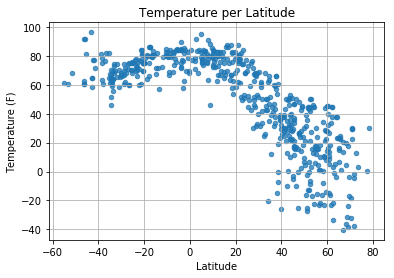

In [12]:
weather.plot.scatter(x="Latitude", y="Temperature (F)", title="Temperature per Latitude", marker="o", alpha = 0.75)
plt.grid(True)
plt.savefig('Temp_perLat.png')
plt.show

#### Latitude vs. Humidity Plot

<function matplotlib.pyplot.show(*args, **kw)>

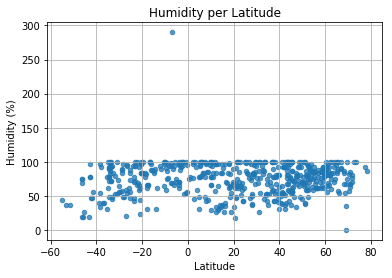

In [13]:
weather.plot.scatter(x="Latitude", y="Humidity (%)", title="Humidity per Latitude", marker="o", alpha = 0.75)
plt.grid(True)
plt.savefig('HumidityperLat.png')
plt.show

#### Latitude vs. Cloudiness Plot

<function matplotlib.pyplot.show(*args, **kw)>

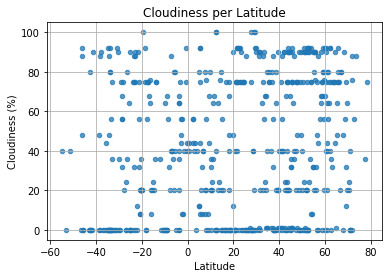

In [14]:
weather.plot.scatter(x="Latitude", y="Cloudiness (%)", title="Cloudiness per Latitude", marker="o", alpha = 0.75)
plt.grid(True)
plt.savefig('CloudperLat.png')
plt.show

#### Latitude vs. Wind Speed Plot

<function matplotlib.pyplot.show(*args, **kw)>

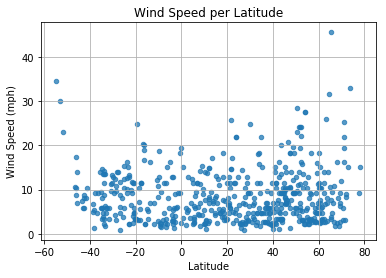

In [15]:
weather.plot.scatter(x="Latitude", y="Wind Speed (mph)", title="Wind Speed per Latitude", marker="o", alpha = 0.75)
plt.grid(True)
plt.savefig('WindperLat.png')
plt.show

In [ ]:
Observation 1: Yes, the temperature does increase significantly between -20 degrees and approx latitude 40 degrees.
Observation 2:There appears to be no correlation between latitude and cloudiness, and only weak correlation between latitude and wind speed. There are higher wind speeds observed in the southern hemisphere.
Observation 3: The humidity seems to decrease for some areas the further away you get from the equator (0 degrees latitude). 